In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/user/lucas-dev/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.4 numpy==1.26.1 scipy==1.11.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 pynndescent==0.5.10


In [3]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [4]:
adata = sc.read_10x_mtx(
    '../data/external/pbmc3k/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)         

... reading from cache file cache/..-data-external-pbmc3k-matrix.h5ad


/home/user/lucas-dev/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [14]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [15]:
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [19]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [48]:
sc.pp.pca(adata, svd_solver="arpack")


computing PCA
    with n_comps=50
    finished (0:00:03)


/home/user/lucas-dev/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


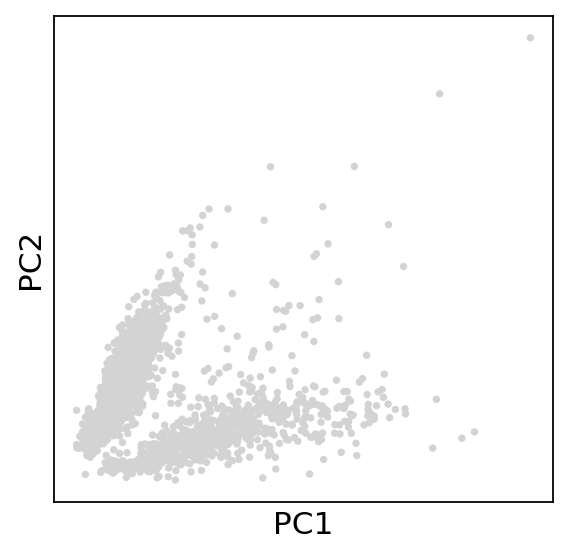

In [51]:
sc.pl.pca_scatter(adata)

In [43]:
np.unique(adata[:, 5].X.toarray())

array([0., 1.], dtype=float32)

In [46]:
np.where(adata[:, 5].X.toarray() == 1)

(array([ 444, 1017, 1106, 1161, 1359, 1434, 1628, 1798, 1812]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [45]:
print(adata[:, 5].X.toarray().tolist())

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]

In [8]:
pd.DataFrame(raw_counts_matrix)

,0
0,"(0, 70)\t1.0\n (0, 166)\t1.0\n (0, 178)\t2..."
1,"(0, 51)\t2.0\n (0, 67)\t1.0\n (0, 81)\t1.0..."
2,"(0, 42)\t1.0\n (0, 53)\t1.0\n (0, 70)\t1.0..."
3,"(0, 42)\t9.0\n (0, 67)\t1.0\n (0, 81)\t3.0..."
4,"(0, 227)\t1.0\n (0, 412)\t2.0\n (0, 464)\t..."
...,...
2695,"(0, 42)\t14.0\n (0, 54)\t1.0\n (0, 62)\t1...."
2696,"(0, 42)\t1.0\n (0, 62)\t1.0\n (0, 67)\t2.0..."
2697,"(0, 81)\t1.0\n (0, 113)\t1.0\n (0, 166)\t2..."
2698,"(0, 68)\t1.0\n (0, 70)\t1.0\n (0, 326)\t1...."


In [6]:
import pandas as pd
import scanpy as sc

# Assuming adata is your AnnData object
# For demonstration, let's assume adata contains raw counts in the `X` attribute

# Access the raw counts matrix
raw_counts_matrix = adata.X

# Access the corresponding row (obs) and column (var) annotations
obs_df = pd.DataFrame(adata.obs)
var_df = pd.DataFrame(adata.var)

# Create a DataFrame from the raw counts matrix
counts_df = pd.DataFrame(raw_counts_matrix, index=adata.obs_names, columns=adata.var_names)

# If you want to include additional information from obs and var in the counts DataFrame
# For example, assuming 'cell_type' is a column in obs and 'gene_symbol' is a column in var
counts_df['cell_type'] = adata.obs['cell_type']
counts_df['gene_symbol'] = adata.var['gene_symbol']

# Now counts_df is a DataFrame with raw counts and additional annotations

# If you want to include the annotations as columns in the counts DataFrame
# you can use the pd.merge function
counts_df = pd.merge(counts_df, obs_df[['cell_type']], left_index=True, right_index=True)
counts_df = pd.merge(counts_df, var_df[['gene_symbol']], left_index=True, right_index=True)

# Now counts_df includes 'cell_type' and 'gene_symbol' as columns

# Print or further process counts_df as needed
print(counts_df)


ValueError: Shape of passed values is (2700, 1), indices imply (2700, 32738)

In [20]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [21]:
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [22]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50


/home/user/lucas-dev/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:02)


/home/user/lucas-dev/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


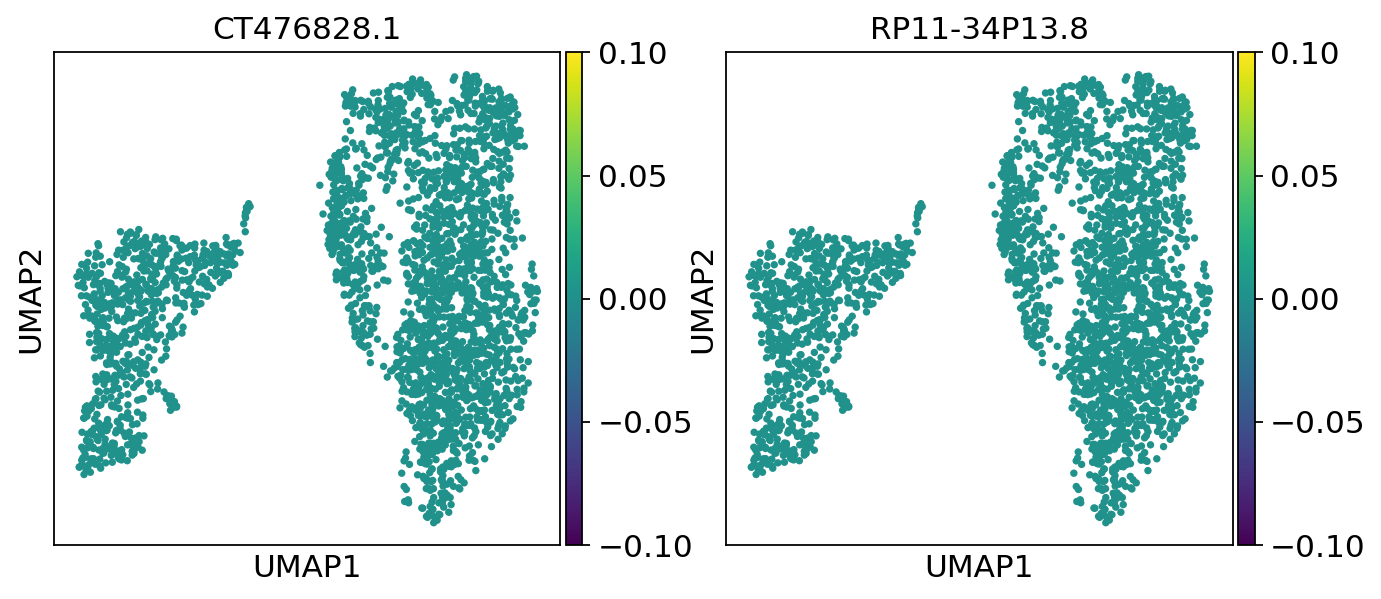

In [28]:
sc.pl.umap(adata, color=['CT476828.1', 'RP11-34P13.8'], use_raw=False)

In [12]:
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [15]:
adata.varm

AxisArrays with keys: 